# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [14]:
# Importando os pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import patsy
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression

# Carregando a base de dados
tips = sns.load_dataset("tips")

# Criando as variáveis necessárias
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

In [9]:
# Definindo a fórmula do modelo
formula = 'tip ~ sex + smoker + day + net_bill'

# Criando a matriz de design e a matriz y usando Patsy
y, X = patsy.dmatrices(formula, data=tips, return_type='dataframe')

# Mostrando as primeiras linhas das matrizes
print("Matriz y:")
print(y.head())

print("\nMatriz X (Design Matrix):")
print(X.head())

Matriz y:
    tip
0  1.01
1  1.66
2  3.50
3  3.31
4  3.61

Matriz X (Design Matrix):
   Intercept  sex[T.Female]  smoker[T.No]  day[T.Fri]  day[T.Sat]  day[T.Sun]  \
0        1.0            1.0           1.0         0.0         0.0         1.0   
1        1.0            0.0           1.0         0.0         0.0         1.0   
2        1.0            0.0           1.0         0.0         0.0         1.0   
3        1.0            0.0           1.0         0.0         0.0         1.0   
4        1.0            1.0           1.0         0.0         0.0         1.0   

   net_bill  
0     15.98  
1      8.68  
2     17.51  
3     20.37  
4     20.98  


In [14]:
# Definindo a fórmula simplificada
formula_simplified = 'tip ~ sex + day + net_bill'

# Criando a nova matriz de design e a nova matriz y
y, X_simplified = patsy.dmatrices(formula_simplified, data=tips, return_type='dataframe')

# Ajustando o modelo simplificado
model_simplified = sm.OLS(y, X_simplified).fit()

# Exibindo o resumo do modelo simplificado
print("\nResumo do Modelo Simplificado:")
print(model_simplified.summary())


Resumo do Modelo Simplificado:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     24.10
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           1.33e-19
Time:                        20:52:18   Log-Likelihood:                -374.97
No. Observations:                 244   AIC:                             761.9
Df Residuals:                     238   BIC:                             782.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     

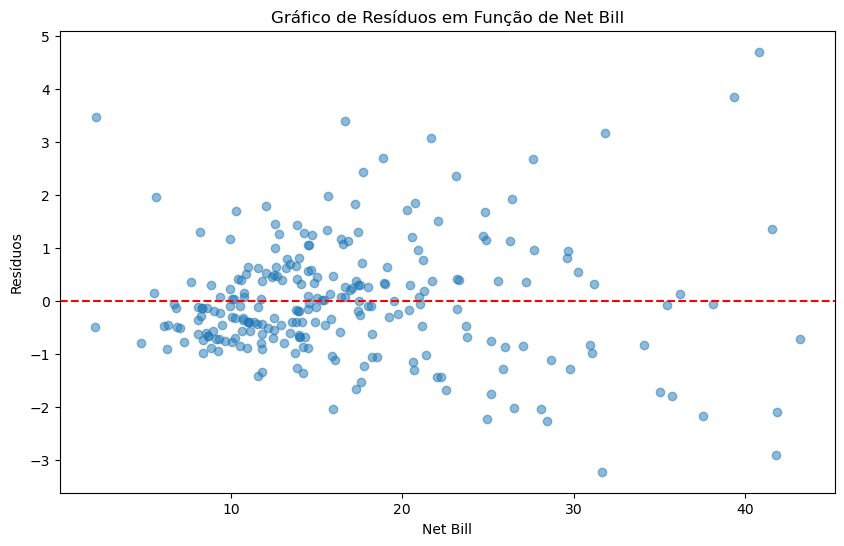

In [17]:
# Calculando os resíduos
residuals = model_simplified.resid

# Criando o gráfico de resíduos em função de net_bill
plt.figure(figsize=(10, 6))
plt.scatter(tips['net_bill'], residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Net Bill')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos em Função de Net Bill')
plt.show()

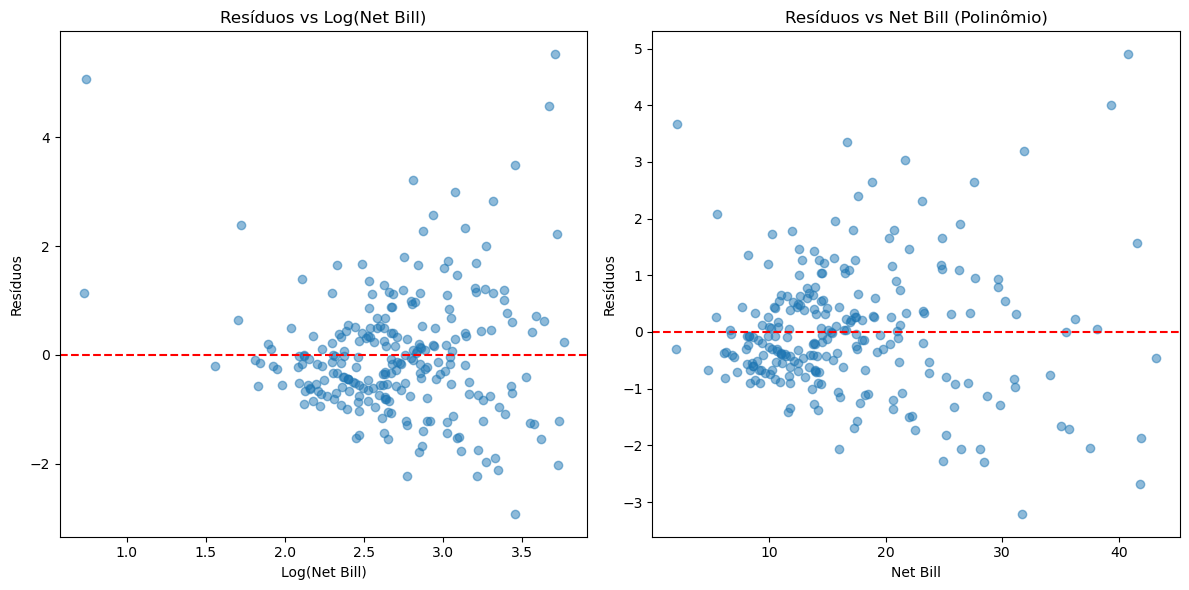

Resumo do Modelo com Log(Net Bill):
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     20.28
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           7.58e-17
Time:                        21:03:27   Log-Likelihood:                -381.65
No. Observations:                 244   AIC:                             775.3
Df Residuals:                     238   BIC:                             796.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept 

In [21]:
# Criando as variáveis necessárias
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['log_net_bill'] = np.log(tips['net_bill'])
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Definindo a fórmula do modelo com log(net_bill)
formula_log_net_bill = 'tip ~ sex + day + log_net_bill'

# Criando a matriz de design e a matriz y para o modelo com log(net_bill)
y, X_log_net_bill = patsy.dmatrices(formula_log_net_bill, data=tips, return_type='dataframe')

# Ajustando o modelo com log(net_bill)
model_log_net_bill = sm.OLS(y, X_log_net_bill).fit()

# Calculando os resíduos para o modelo com log(net_bill)
residuals_log_net_bill = model_log_net_bill.resid

# Criando o gráfico de resíduos em função de log(net_bill)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(tips['log_net_bill'], residuals_log_net_bill, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Log(Net Bill)')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Log(Net Bill)')

# Definindo a fórmula do modelo com polinômio de segundo grau em net_bill
formula_poly_net_bill = 'tip ~ sex + day + net_bill + net_bill_squared'

# Criando a matriz de design e a matriz y para o modelo com polinômio de segundo grau em net_bill
y, X_poly_net_bill = patsy.dmatrices(formula_poly_net_bill, data=tips, return_type='dataframe')

# Ajustando o modelo com polinômio de segundo grau em net_bill
model_poly_net_bill = sm.OLS(y, X_poly_net_bill).fit()

# Calculando os resíduos para o modelo com polinômio de segundo grau em net_bill
residuals_poly_net_bill = model_poly_net_bill.resid

# Criando o gráfico de resíduos em função de net_bill
plt.subplot(1, 2, 2)
plt.scatter(tips['net_bill'], residuals_poly_net_bill, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Net Bill')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Net Bill (Polinômio)')

plt.tight_layout()
plt.show()

# Resultados dos modelos
print("Resumo do Modelo com Log(Net Bill):")
print(model_log_net_bill.summary())

print("\nResumo do Modelo com Polinômio de Segundo Grau em Net Bill:")
print(model_poly_net_bill.summary())

***O modelo com polinômio de segundo grau tem um R² mais alto (0.338) em comparação com o modelo com log de net_bill (0.299), indicando que o modelo polinomial explica uma maior proporção da variabilidade em tip.***

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [24]:
# Criando a variável log_tip
tips['log_tip'] = np.log(tips['tip'])

# Criando a variável net_bill
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Definindo a fórmula do modelo
formula = 'log_tip ~ sex + smoker + day + net_bill'

# Criando a matriz de design e a matriz y usando patsy
y, X = patsy.dmatrices(formula, data=tips, return_type='dataframe')

# Mostrando as primeiras linhas das matrizes para verificação
print("Matriz X (design):")
print(X.head())

print("\nMatriz y:")
print(y.head())

Matriz X (design):
   Intercept  sex[T.Female]  smoker[T.No]  day[T.Fri]  day[T.Sat]  day[T.Sun]  \
0        1.0            1.0           1.0         0.0         0.0         1.0   
1        1.0            0.0           1.0         0.0         0.0         1.0   
2        1.0            0.0           1.0         0.0         0.0         1.0   
3        1.0            0.0           1.0         0.0         0.0         1.0   
4        1.0            1.0           1.0         0.0         0.0         1.0   

   net_bill  
0     15.98  
1      8.68  
2     17.51  
3     20.37  
4     20.98  

Matriz y:
    log_tip
0  0.009950
1  0.506818
2  1.252763
3  1.196948
4  1.283708


In [26]:
# Ajuste a fórmula conforme os resultados do resumo do modelo inicial
formula_reduced = 'log_tip ~ sex + net_bill'

# Criar a nova matriz de design e a matriz y usando patsy
y, X_reduced = patsy.dmatrices(formula_reduced, data=tips, return_type='dataframe')

# Ajustar o modelo reduzido
model_reduced = sm.OLS(y, X_reduced).fit()

# Mostrar o resumo do modelo reduzido
print("\nResumo do Modelo Reduzido:")
print(model_reduced.summary())

# Exibir as primeiras linhas das matrizes para verificação
print("\nMatriz X (design) do modelo reduzido:")
print(X_reduced.head())

print("\nMatriz y do modelo reduzido:")
print(y.head())


Resumo do Modelo Reduzido:
                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     54.29
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           3.43e-20
Time:                        21:16:47   Log-Likelihood:                -97.885
No. Observations:                 244   AIC:                             201.8
Df Residuals:                     241   BIC:                             212.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         

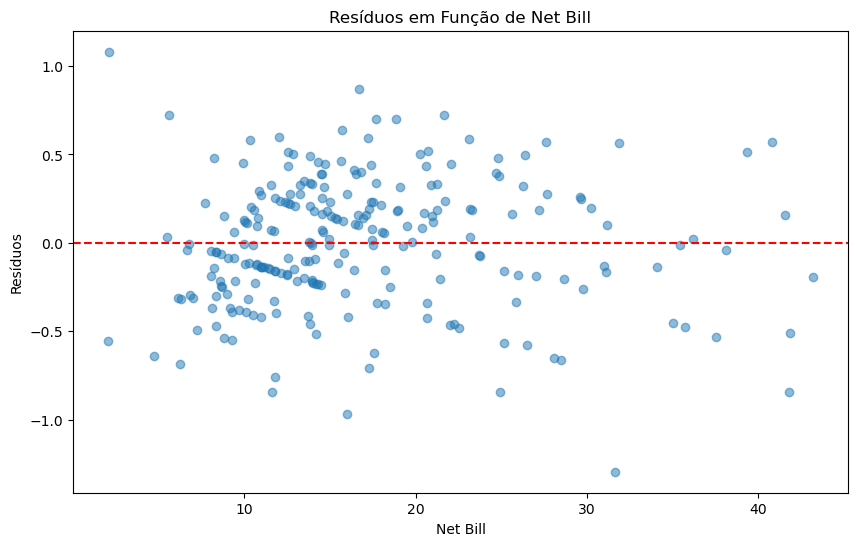

In [28]:
# Calcular os resíduos
residuals = model_reduced.resid

# Adicionar os resíduos à base de dados para visualização
tips['residuals'] = residuals

# Criar o gráfico de resíduos em função de net_bill
plt.figure(figsize=(10, 6))
plt.scatter(tips['net_bill'], tips['residuals'], alpha=0.5)
plt.title('Resíduos em Função de Net Bill')
plt.xlabel('Net Bill')
plt.ylabel('Resíduos')
plt.axhline(y=0, color='r', linestyle='--')  # Linha horizontal no zero
plt.show()

In [34]:
# Criar a variável net_bill
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['log_net_bill'] = np.log(tips['net_bill'] + 1)  # +1 para evitar log(0) se houver valores zero

# Adicionar polinômio de segundo grau em net_bill
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Ajustar o modelo com log(net_bill)
formula_log = 'log_tip ~ sex + smoker + day + log_net_bill'
y_log, X_log = patsy.dmatrices(formula_log, data=tips, return_type='dataframe')
model_log = sm.OLS(y_log, X_log).fit()

# Ajustar o modelo com polinômio de segundo grau em net_bill
formula_poly = 'log_tip ~ sex + smoker + day + net_bill + net_bill_squared'
y_poly, X_poly = patsy.dmatrices(formula_poly, data=tips, return_type='dataframe')
model_poly = sm.OLS(y_poly, X_poly).fit()

# Comparar R² dos modelos
r2_log = model_log.rsquared
r2_poly = model_poly.rsquared

# Escolher o melhor modelo
if r2_log > r2_poly:
    print("\nO modelo com Log(Net Bill) é o melhor modelo com base no R².")
else:
    print("\nO modelo com Polinômio de Segundo Grau em Net Bill é o melhor modelo com base no R².")


O modelo com Polinômio de Segundo Grau em Net Bill é o melhor modelo com base no R².


In [41]:
# Criar as variáveis
tips['log_tip'] = np.log(tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['log_net_bill'] = np.log(tips['net_bill'] + 1)  # +1 para evitar log(0)
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Ajustar o modelo com log(net_bill)
formula_log = 'log_tip ~ sex + smoker + day + log_net_bill'
y_log, X_log = patsy.dmatrices(formula_log, data=tips, return_type='dataframe')
model_log = sm.OLS(y_log, X_log).fit()

# Fazer previsões e transformá-las de volta à escala original
pred_log = np.exp(model_log.fittedvalues)  # Transformar as previsões de volta ao valor original

# Calcular o R² na escala original
r2_log_original = r2_score(tips['tip'], pred_log)

# Comparar com o modelo do polinômio de segundo grau
r2_poly = 0.338

print("\nR² do Modelo com Log(Net Bill) na escala original de 'tip':", r2_log_original)
print("R² do Modelo com Polinômio de Segundo Grau em Net Bill:", r2_poly)

# Escolher o melhor modelo com base no R²
if r2_log_original > r2_poly:
    print("\nO modelo com Log(Net Bill) é o melhor modelo com base no R² na escala original.")
else:
    print("\nO modelo com Polinômio de Segundo Grau em Net Bill é o melhor modelo com base no R² na escala original.")


R² do Modelo com Log(Net Bill) na escala original de 'tip': 0.3031811358718286
R² do Modelo com Polinômio de Segundo Grau em Net Bill: 0.338

O modelo com Polinômio de Segundo Grau em Net Bill é o melhor modelo com base no R² na escala original.


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [6]:
# Importa a biblioteca pandas
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o arquivo CSV
df = pd.read_csv('previsao_de_renda.csv')

# Exibe as primeiras linhas do DataFrame
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


tempo_emprego    2534
renda               0
dtype: int64
0.1917808219178082
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        10:55:11   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

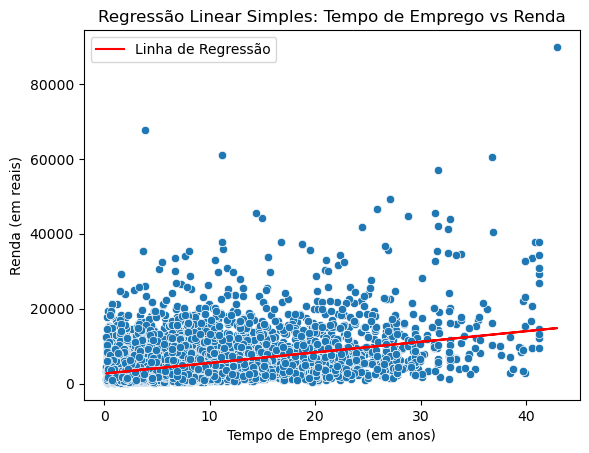

In [10]:
#1

# Verifica se há valores ausentes na coluna 'tempo_emprego' e 'renda'
print(df[['tempo_emprego', 'renda']].isnull().sum())

# Remove linhas com valores ausentes nas colunas 'tempo_emprego' e 'renda'
df_clean = df.dropna(subset=['tempo_emprego', 'renda'])

# Verifica se a variável 'tempo_emprego' tem algum valor negativo
print(df_clean['tempo_emprego'].min())

# Adiciona uma constante ao modelo (intercepto)
X = sm.add_constant(df_clean['tempo_emprego'])

# Define a variável resposta
y = df_clean['renda']

# Ajusta o modelo de regressão linear simples
model = sm.OLS(y, X).fit()

# Exibe o resumo do modelo
print(model.summary())

# Visualiza a relação entre tempo_emprego e renda
sns.scatterplot(x=df_clean['tempo_emprego'], y=df_clean['renda'])
plt.plot(df_clean['tempo_emprego'], model.predict(X), color='red', label='Linha de Regressão')
plt.xlabel('Tempo de Emprego (em anos)')
plt.ylabel('Renda (em reais)')
plt.title('Regressão Linear Simples: Tempo de Emprego vs Renda')
plt.legend()
plt.show()

In [30]:
#2
# Para melhorar o modelo decidi incluir termos quadráticos para capturar melhor a variação na renda. O que resultou em um melhor R-squared

# Verifique e remova valores ausentes
df_clean = df_clean.dropna().copy()

# Transformar variáveis categóricas em variáveis dummy
df_dummies = pd.get_dummies(df_clean[['educacao', 'tipo_renda']], drop_first=True)

# Combinar as variáveis dummy com as variáveis numéricas
X_multi = pd.concat([df_clean[['tempo_emprego', 'idade']], df_dummies], axis=1)

# Adiciona um termo quadrático para tempo_emprego
df_clean['tempo_emprego_quad'] = df_clean['tempo_emprego'] ** 2
X_poly = sm.add_constant(df_clean[['tempo_emprego', 'tempo_emprego_quad']])

# Ajusta o modelo polinomial
model_poly = sm.OLS(y, X_poly).fit()

# Exibe o resumo do modelo polinomial
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1258.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:03:46   Log-Likelihood:            -1.2240e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12463   BIC:                         2.448e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3407.0877     81

In [45]:
# Verifique e remova valores ausentes
df_clean = df.dropna().copy()  # Adicionei .copy() para evitar problemas com visualizações de DataFrames

# Converter colunas numéricas para o tipo correto usando .loc[]
num_cols = ['tempo_emprego', 'idade', 'qtd_filhos', 'qt_pessoas_residencia']
df_clean.loc[:, num_cols] = df_clean.loc[:, num_cols].apply(pd.to_numeric, errors='coerce')

# Transformar variáveis categóricas em variáveis dummy
df_dummies = pd.get_dummies(df_clean[['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']], drop_first=True)

# Combinar as variáveis dummy com as variáveis numéricas
X_multi = pd.concat([df_clean[num_cols], df_dummies], axis=1)

# Variável resposta
y = pd.to_numeric(df_clean['renda'], errors='coerce')

# Adicionar uma constante
X_multi = sm.add_constant(X_multi)

# Converter todas as colunas para float64
X_multi = X_multi.astype(float)
y = y.astype(float)

# Verificar e remover NaNs (que podem ter surgido na conversão)
X_multi = X_multi.dropna()
y = y.dropna()

# Ajustar o modelo de regressão linear múltipla
model_multi = sm.OLS(y, X_multi).fit()

# Exibir o resumo do modelo
print(model_multi.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     146.9
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:24:13   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12441   BIC:                         2.442e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [42]:
#4

# Lista de variáveis insignificantes para remover
insignificant_vars = [
    'qtd_filhos', 'qt_pessoas_residencia', 'posse_de_veiculo', 
    'tipo_renda_Bolsista', 'tipo_renda_Pensionista', 'educacao_Secundário', 
    'educacao_Superior completo', 'educacao_Superior incompleto', 
    'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União', 
    'estado_civil_Viúvo', 'tipo_residencia_Casa', 'tipo_residencia_Com os pais', 
    'tipo_residencia_Comunitário', 'tipo_residencia_Estúdio'
]

# Remover as variáveis insignificantes
X_multi_reduced = X_multi.drop(columns=insignificant_vars)

# Ajustar o modelo de regressão linear múltipla com as variáveis restantes
model_multi_reduced = sm.OLS(y, X_multi_reduced).fit()

# Exibir o resumo do novo modelo
print(model_multi_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     431.2
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:18:55   Log-Likelihood:            -1.2202e+05
No. Observations:               12466   AIC:                         2.441e+05
Df Residuals:                   12457   BIC:                         2.441e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

##### R-squared: 0.217:
O modelo explica aproximadamente 21.7% da variação na variável renda. Isso é uma piora em relação ao modelo anterior e indica que há uma quantidade considerável de variabilidade na renda que não é explicada pelo modelo.

##### const (Intercepto): 60.9581:
O intercepto do modelo, que é o valor da renda quando todas as variáveis explicativas são zero. O valor p de 0.747 sugere que o intercepto não é estatisticamente significativo.

##### tempo_emprego: 299.9860:
Para cada ano adicional de tempo de emprego, a renda aumenta em média cerca de 300 unidades. Este coeficiente é altamente significativo (p < 0.001).

##### idade: 25.5445:
Para cada ano adicional de idade, a renda aumenta em média cerca de 25,5 unidades. O coeficiente é significativo (p < 0.001), indicando que a idade tem um efeito positivo na renda.

##### posse_de_imovel: 398.2282:
Ter posse de imóvel está associado a um aumento médio de cerca de 398 unidades na renda. Este coeficiente é significativo (p < 0.001), mostrando um efeito positivo da posse de imóvel na renda.

##### sexo_M: 2340.1626:
Ser do sexo masculino está associado a um aumento médio de cerca de 2340 unidades na renda, o que é altamente significativo (p < 0.001).

##### tipo_renda_Empresário: 1065.0252:
Ser empresário está associado a um aumento médio de cerca de 1065 unidades na renda. Este coeficiente é significativo (p < 0.001).

##### tipo_renda_Servidor público: 509.6536:
Ser servidor público está associado a um aumento médio de cerca de 510 unidades na renda. O coeficiente é significativo (p < 0.001).

##### educacao_Pós graduação: 2252.4823:
Ter educação de pós-graduação está associado a um aumento médio de cerca de 2252 unidades na renda. Este coeficiente é significativo (p = 0.023).

##### tipo_residencia_Governamental: -526.0677:
Viver em uma residência governamental está associado a uma diminuição média de cerca de 526 unidades na renda. O coeficiente é significativo (p = 0.023).

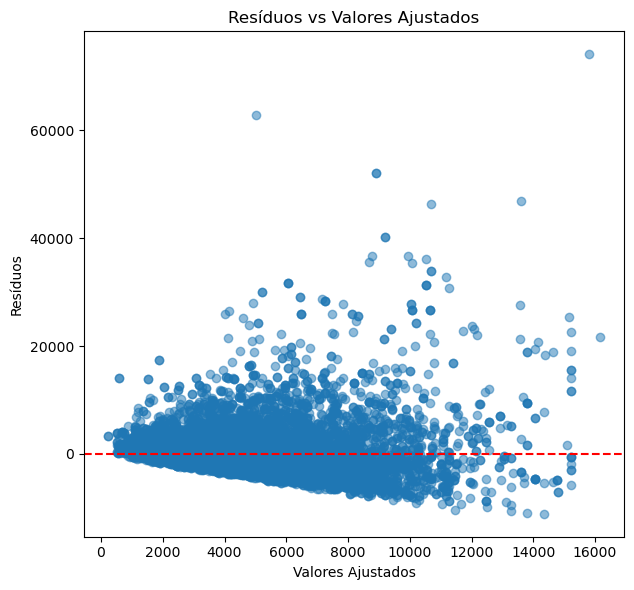

In [60]:
#5

# Adicionar coluna de intercepto ao modelo
X_multi = sm.add_constant(X_multi)

# Ajustar o modelo de regressão linear múltipla
model_multi = sm.OLS(y, X_multi).fit()

# Obter resíduos
residuos = model_multi.resid
valores_ajustados = model_multi.fittedvalues

# Plotar resíduos versus valores ajustados
plt.figure(figsize=(12, 6))

# Resíduos vs Valores Ajustados
plt.subplot(1, 2, 1)
plt.scatter(valores_ajustados, residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados')

plt.tight_layout()
plt.show()

##### Distribuição dos Resíduos:
 Os resíduos parecem estar distribuídos aleatoriamente em torno da linha zero Isso é um bom sinal, pois sugere que o modelo não está cometendo erros sistemáticos

##### R-squared:
 Também obtivemos um valor de R-squared maior que na primeira regressão o que demonstra melhora em relação ao primeiro modelo que construí